<a href="https://colab.research.google.com/github/HarshMartinTopno/From_Scratch/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

###**Algorithm followed:**

---

1. **Class Definition**:
   - Create a class `LinearRegression`.

2. **`__init__` Method**:
   - Initialize `weights`, `bias`, and `learning_rate`.

3. **`fit` Method**:
   - Input: `X` (feature matrix) and `y` (target vector).
   - Initialize `weights` and `bias`.
   - Perform gradient descent:
     - Compute predictions.
     - Compute error.
     - Compute gradients.
     - Update `weights` and `bias`.
   - Repeat for a fixed number of iterations.

4. **`predict` Method**:
   - Input: `X` (feature matrix).
   - Compute predictions using learned `weights` and `bias`.
   - Return predictions.

---



In [19]:
import numpy as np

In [20]:
class LinearRegression:
  def __init__(self, lr = 0.001, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_sample, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in range(self.n_iters):

      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_sample)*2*np.dot(X.T,(y_pred - y))
      db = (1/n_sample)*2*np.sum(y_pred-y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

###Testing

Checking how my model performs


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [76]:
X, y = datasets.make_regression(n_samples = 1000, n_features = 1, noise = 20, random_state = 420)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

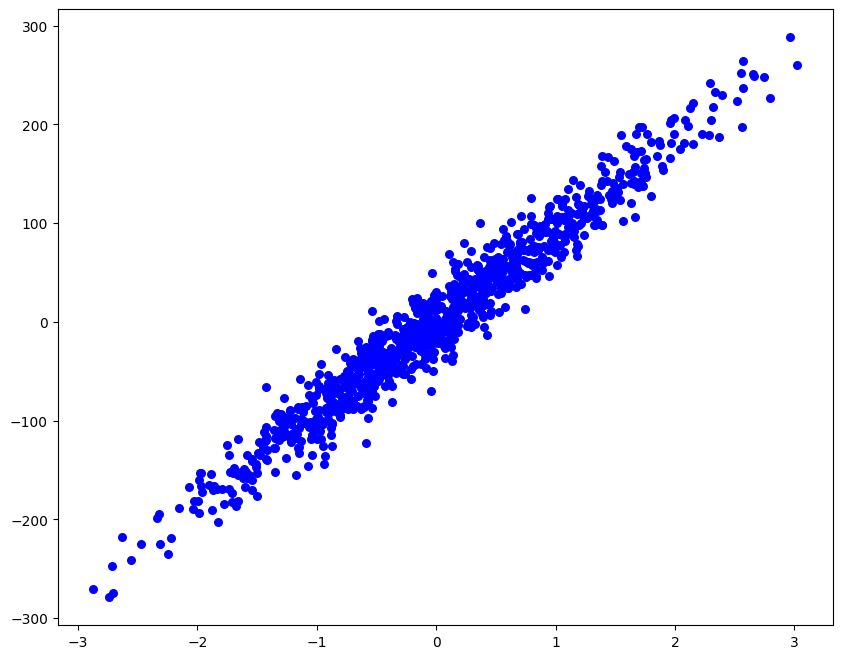

In [77]:
fig = plt.figure(figsize = (10,8))
plt.scatter(X[:,0], y, color = 'b', marker = 'o', s = 30)
plt.show()

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
def mse(y_test, y_pred):
  return np.mean((y_test-y_pred)**2)

In [80]:
mse = mse(y_test, y_pred)
print(mse)

587.1760700547693


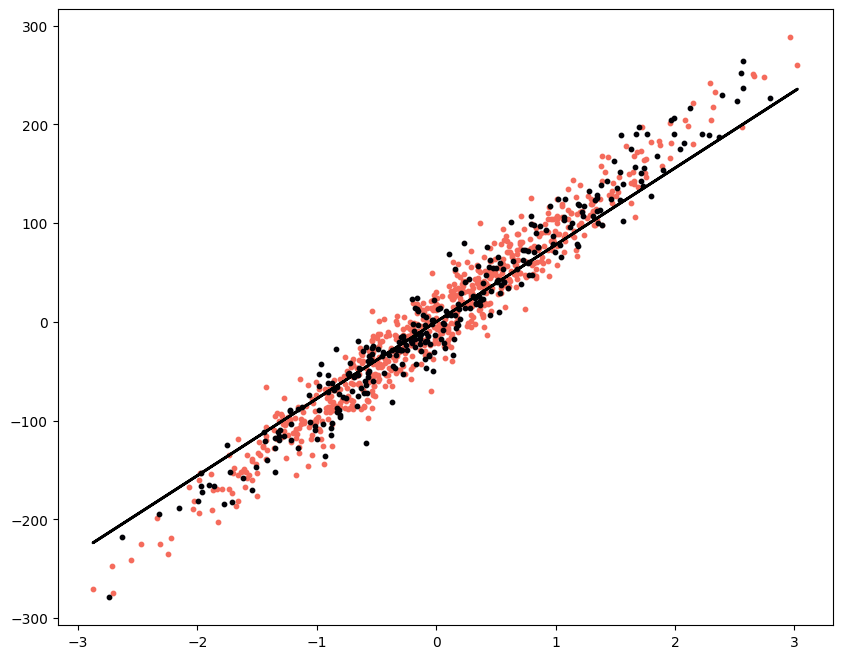

In [87]:
y_pred_line = model.predict(X)
cmap = plt.get_cmap('magma')
fig = plt.figure(figsize = (10,8))
m1 = plt.scatter(X_train, y_train, color = cmap(0.69), s = 10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.01), s = 10)
plt.plot(X, y_pred_line, color = "black", linewidth = 2, label = 'Prediction')
plt.show()